# Example of light sources

## Creating an instance

An instance must be created before starting to operate with light sources. The initialization accepts several arguments.     

### Creating an instance

In [36]:
from diffractio import degrees, mm, nm, um
from diffractio import  np, plt, sp
from diffractio.scalar_sources_XY import Scalar_source_XY

In [37]:
# size of figures
import matplotlib
matplotlib.rcParams['figure.figsize']=[4,4]
matplotlib.rcParams['figure.dpi']=125

## plane wave

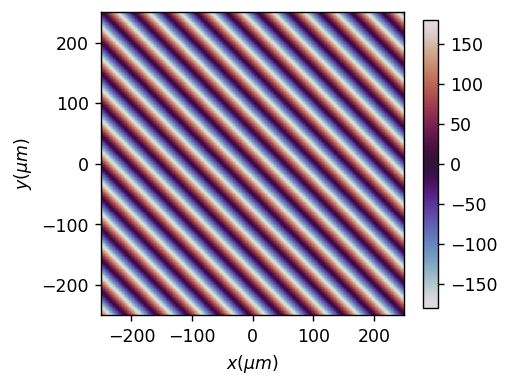

In [38]:
x0 = np.linspace(-250 * um, 250 * um, 512)
y0 = np.linspace(-250 * um, 250 * um, 512)

wavelength = 0.6328 * um


u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u.plane_wave(phi=1 * degrees, theta=45 * degrees)

u.draw(kind='phase',has_colorbar='vertical');

## Gauss beam

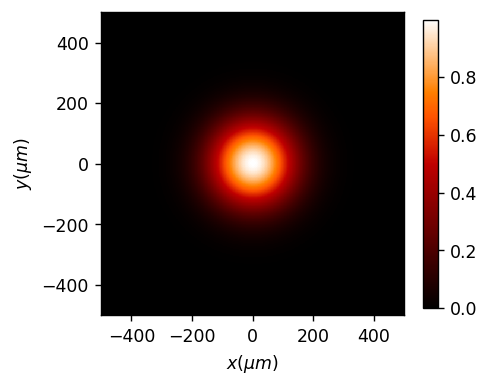

In [22]:
x0 = np.linspace(-500*um, 500*um, 512)
y0 = np.linspace(-500*um, 500*um, 512)
wavelength = 0.6238 * um

u = Scalar_source_XY(x=x0, y=y0, 
                     wavelength=wavelength)

u.gauss_beam(
    A=1,
    r0=(0 * um, 0 * um),
    z0=0,
    w0=(200 * um, 200 * um),
    phi=0 * degrees,
    theta=0 * degrees)

u.draw(kind='intensity', has_colorbar='vertical');

## spherical wave

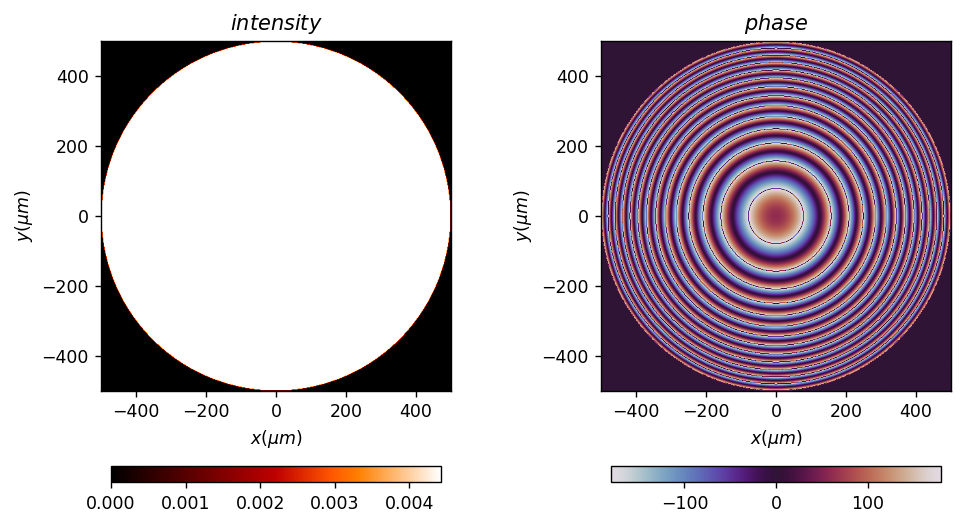

In [23]:
x0 = np.linspace(-500*um, 500*um, 512)
y0 = np.linspace(-500*um, 500*um, 512)
wavelength = 0.6238 * um

u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

u.spherical_wave(
    A=1, r0=(0 * um, 0 * um), z0=-15 * mm, radius=500 * um, mask=True)

u.draw(kind='field', normalize='maximum');

## vortex beam

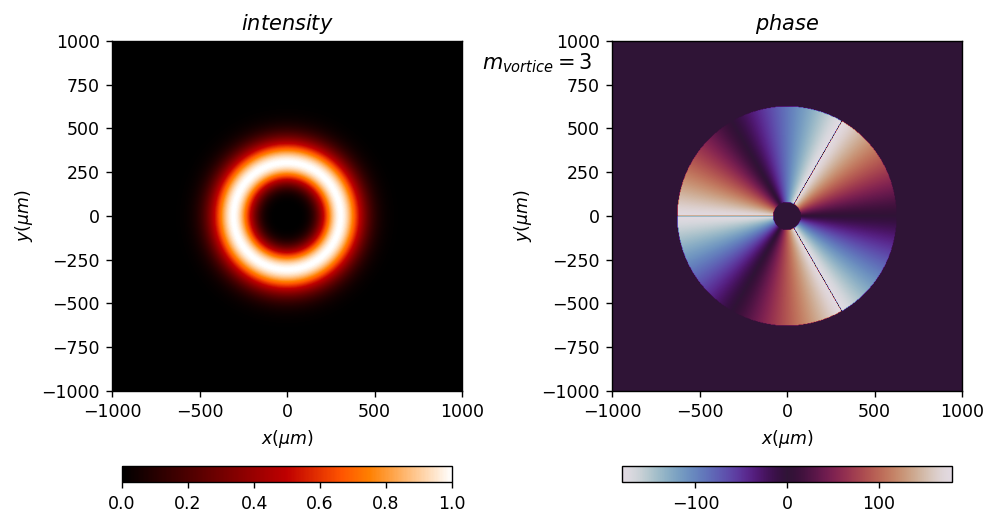

In [24]:
x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

m=3
u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u.vortex_beam(A=1,r0=(0, 0), w0=250 * um, m=m)

title = '$m_{vortice}= %d$' % (m)
u.draw(kind='field', title=title);

## Vortex beams

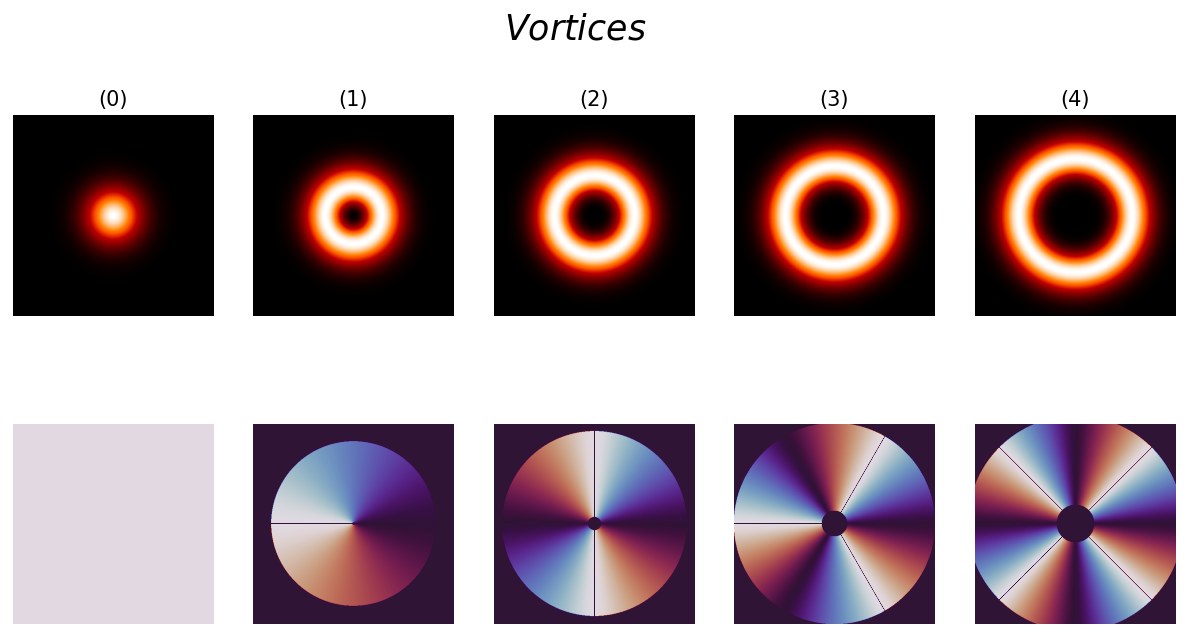

In [25]:
M = 5

x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

ID1 = plt.figure(figsize=(12,6))
plt.suptitle("$Vortices$", fontsize=20)


for m in range(M):
    u.vortex_beam(A=1, r0=(0 * um, 0 * um), w0=400 * um, m=m)
    intensity=np.abs(u.u)**2
    phase=np.angle(u.u)/degrees
    phase[intensity<0.005]=0

    # drawings
    title = "(%d)" % (m)
    plt.subplot(2, M, m + 1)
    plt.axis('off')
    plt.title(title)
    h1 = plt.imshow(intensity)
    h1.set_cmap("gist_heat")

    plt.subplot(2, M, m + M + 1)
    plt.axis('off')
    h2 = plt.imshow(phase)
    h2.set_cmap("twilight");

## Laguerre beam

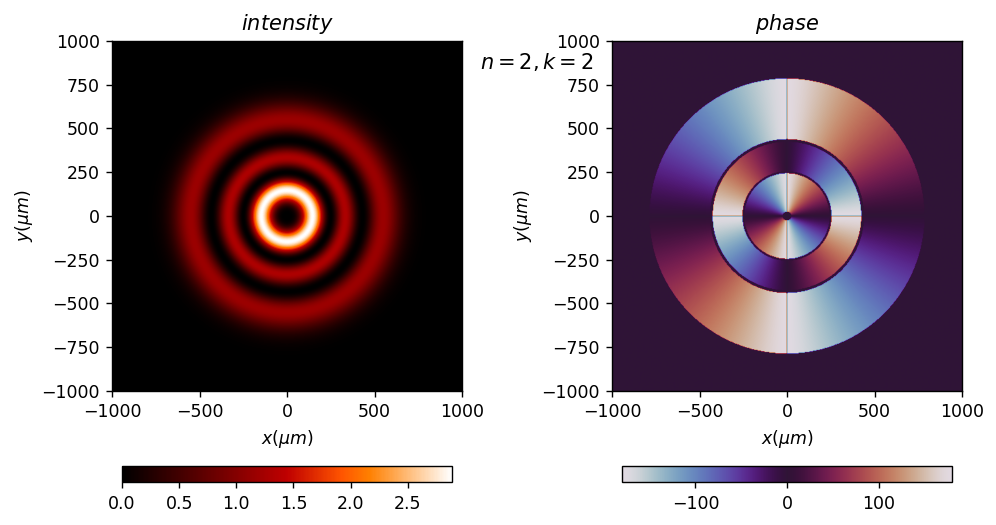

In [26]:
N = 2
K = 2

x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

u.laguerre_beam(A=1,
    n=N, l=K, r0=(0 * um, 0 * um), w0=250 * um, z0=0, z=0.01 * um)

title = r'$n=%d, k=%d$' % (N, K)
u.draw(kind='field', title=title);

## Laguerre beams

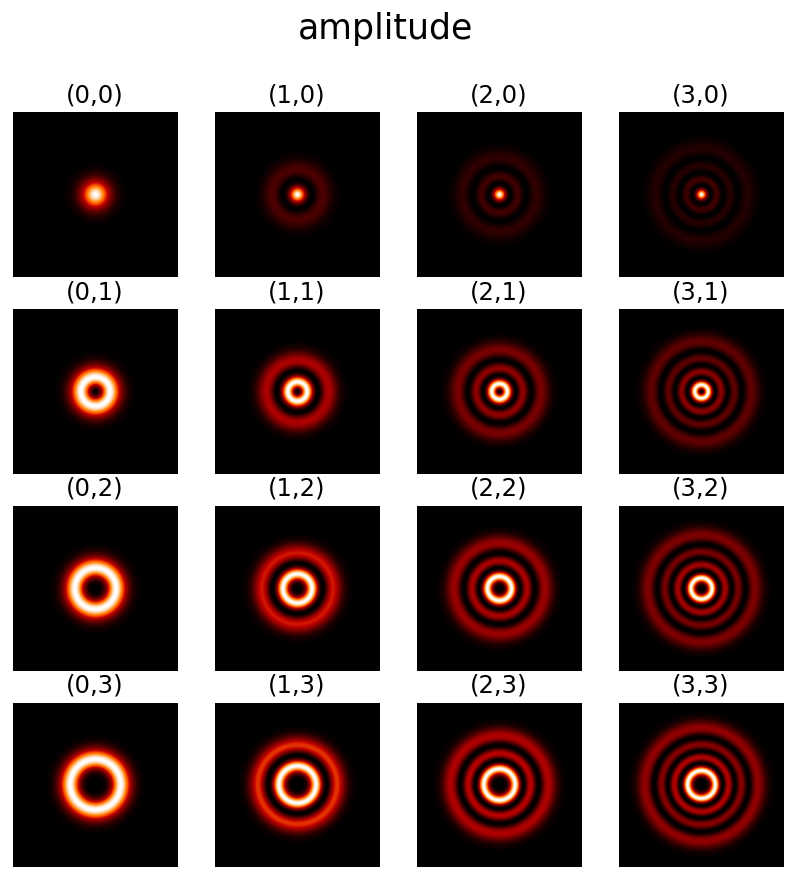

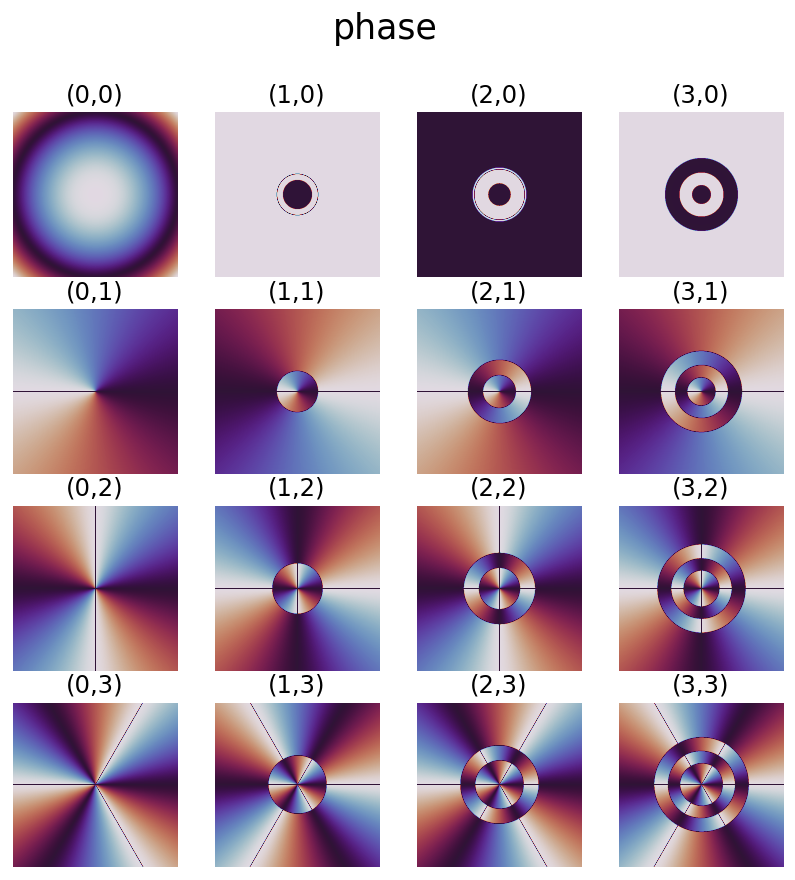

In [27]:
N = 3
K = 3

x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

ID1 = plt.figure(figsize=(8,8))
plt.suptitle("amplitude", fontsize=20)
ID2 = plt.figure(figsize=(8,8))
plt.suptitle("phase", fontsize=20)


for n in range(N + 1):
    for k in range(K + 1):

        u.laguerre_beam(A=1, 
            n=n, l=k, r0=(0 * um, 0 * um), w0=250 * um, z0=0,  z=0.01 * um)

        title = "(%d,%d)" % (n, k)
        plt.figure(ID1.number)
        plt.subplot(N + 1, K + 1, (N + 1) * (k) + n + 1)
        plt.axis('off')
        plt.title(title, fontsize=14)
        h1 = plt.imshow(np.abs(u.u)**2)
        h1.set_cmap("gist_heat")

        plt.figure(ID2.number)
        plt.subplot(N + 1, K + 1, (N + 1) * (k) + n + 1)
        plt.axis('off')
        plt.title(title, fontsize=14)
        h2 = plt.imshow(np.angle(u.u))
        h2.set_cmap("twilight")

plt.figure(ID1.number)
plt.figure(ID2.number);

## Hermite_Gauss

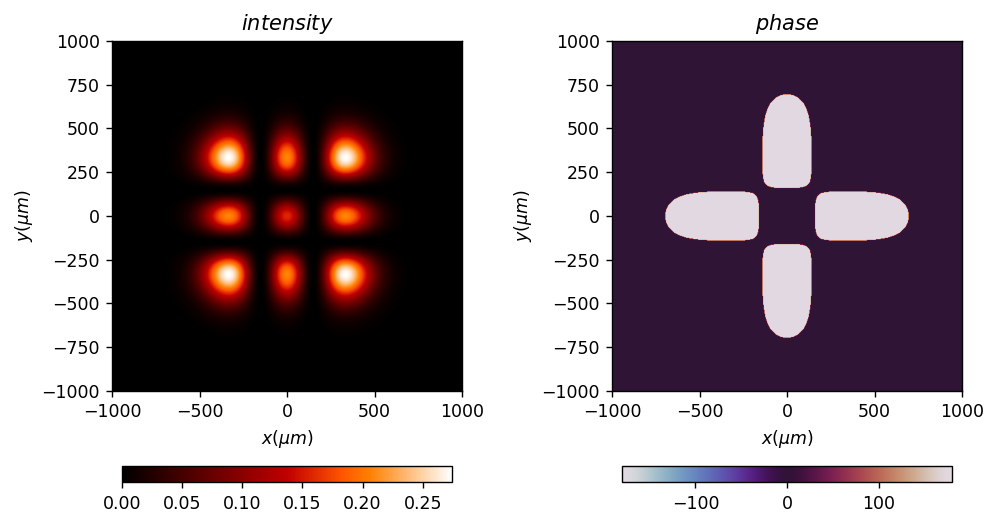

In [28]:
x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

u.hermite_gauss_beam(A=1, r0=(0, 0), w0=[.3*mm, .3*mm], z0=(0,0*mm), z=0, n=2, m=2)

u.draw(kind='field');

## Zernike beam

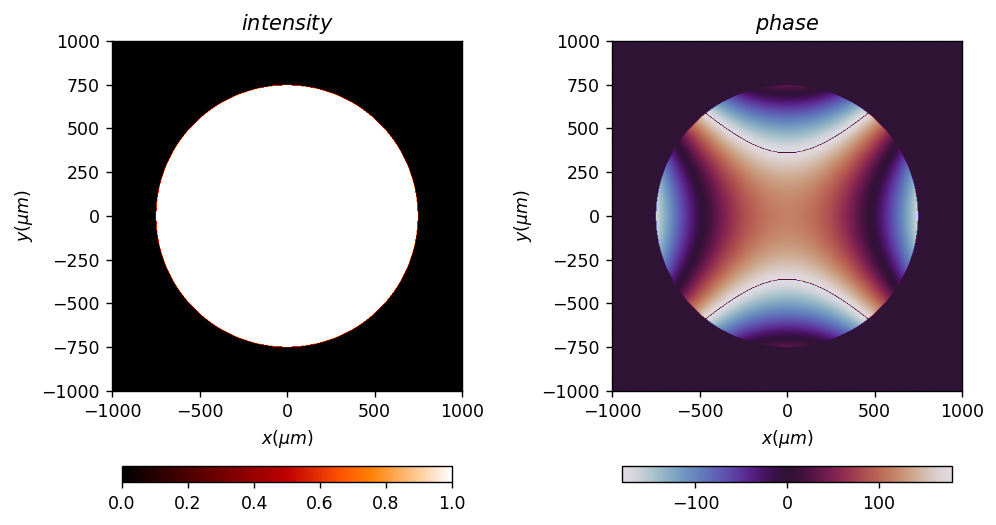

In [29]:
N = np.array([0, 2])
M = np.array([0, 2])
c_nm = np.array([2,  2])


x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

u.zernike_beam(
    A=1, r0=(0, 0), radius=750*um, n=N, m=M, c_nm=c_nm, mask=True)
u.draw(kind='field');

## Zernike beams

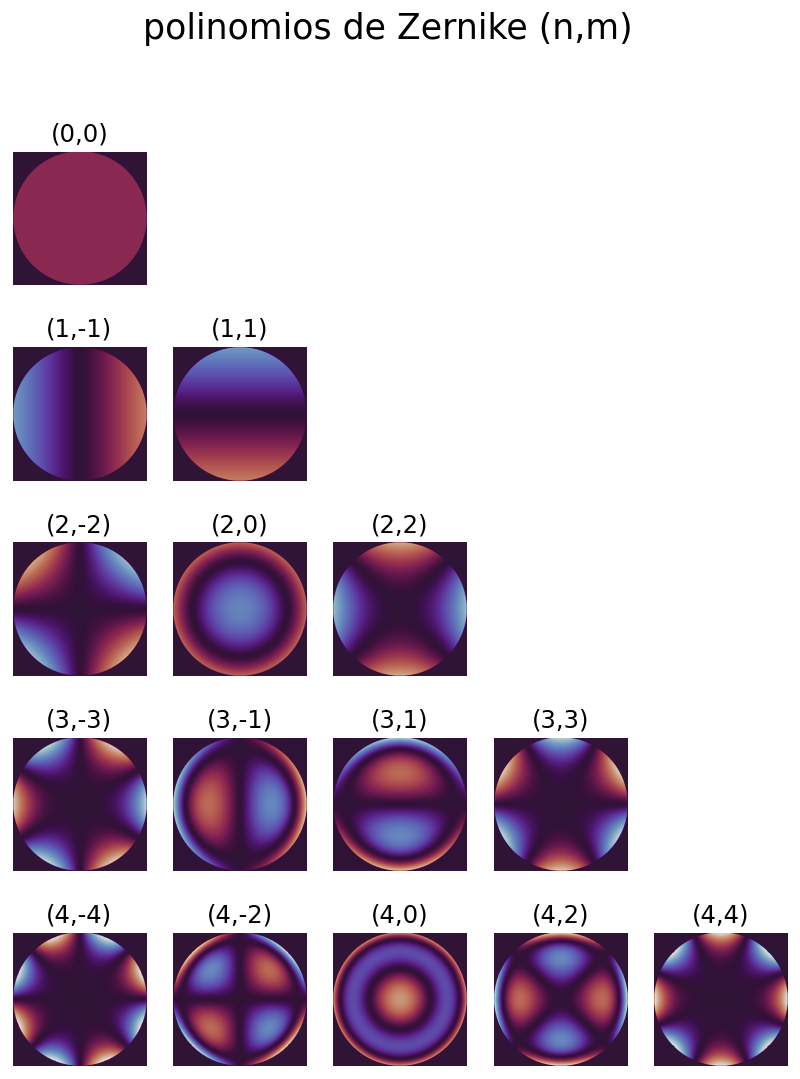

In [30]:
N = 4


x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um


plt.figure(figsize=(8,10))
plt.suptitle(u"polinomios de Zernike (n,m)", fontsize=20)

u = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

for n in range(0, N + 1):
    pos = 0
    for m in range(-n, n + 1, 2):
        pos = pos + 1

        u.zernike_beam(
            A=1,
            r0=(0, 0),
            radius=1*mm,
            n=np.array([n]),
            m=np.array([m]),
            c_nm=np.array([1]),
            mask=True)

        title = "(%d,%d)" % (n, m)
        plt.subplot(N + 1, N + 1, n * (N + 1) + pos)
        plt.axis('off')
        plt.title(title, fontsize=14)
        h2 = plt.imshow(np.angle(u.u))
        plt.clim(vmin=-np.pi, vmax=np.pi)
        h2.set_cmap("twilight")

## Several plane waves inclined

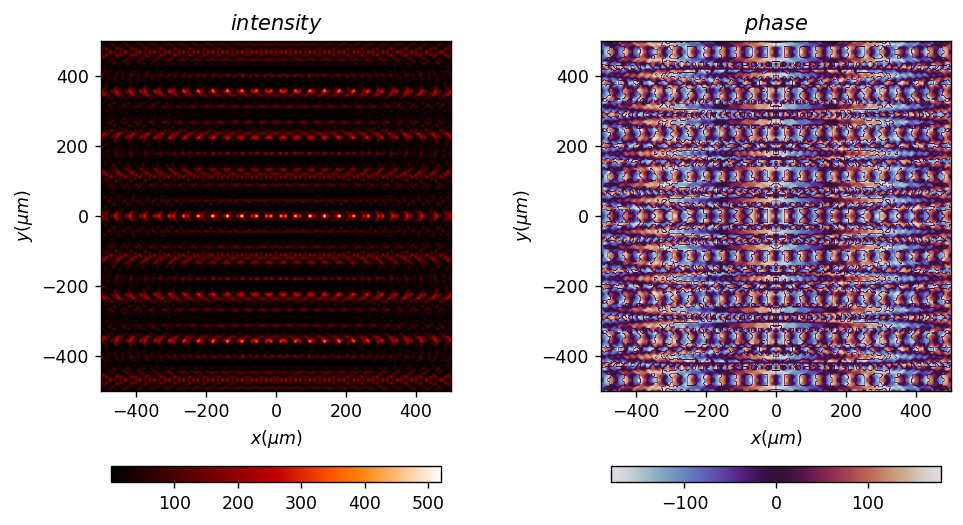

In [31]:
x0 = np.linspace(-500 * um, 500 * um, 256)
y0 = np.linspace(-500 * um, 500 * um, 256)
wavelength = 0.6328 * um

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_waves_several_inclined(
    A=1, num_beams=(5, 5), max_angle=(5 * degrees, 180 * degrees))
u0.draw(kind='field');

## plane waves with parameters from dictionary

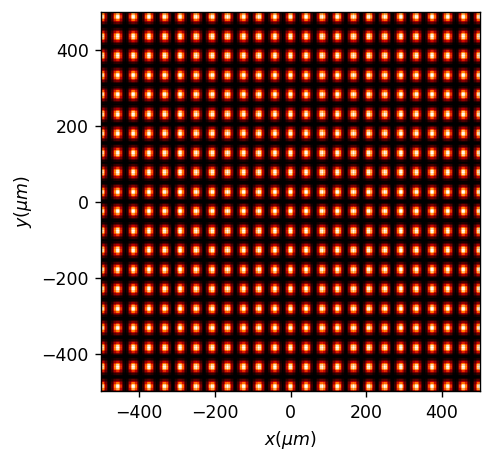

In [32]:
x0 = np.linspace(-500 * um, 500 * um, 256)
y0 = np.linspace(-500 * um, 500 * um, 256)
wavelength = 0.6328 * um

params=[]
p1=dict(A=1, theta=5*degrees, phi=5*degrees, z0=0)
p2=dict(A=1, theta=-5*degrees, phi=5*degrees, z0=0)
p3=dict(A=1, theta=5*degrees, phi=-5*degrees, z0=0)
p4=dict(A=1, theta=-5*degrees, phi=-5*degrees, z0=0)

params.append(p1)
params.append(p2)
params.append(p3)
params.append(p4)

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_waves_dict(params)
u0.draw();

## several parallel Gauss beams

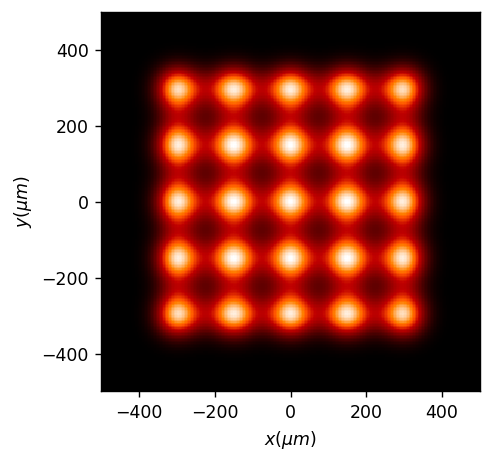

In [33]:
x0 = np.linspace(-500 * um, 500 * um, 256)
y0 = np.linspace(-500 * um, 500 * um, 256)
wavelength = 0.6328 * um

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.gauss_beams_several_parallel(
    A=1,
    num_beams=(5, 5),
    w0=75 * um,
    z0=0 * um,
    r0=(0 * um, 0 * um),
    r_range=(750 * um, 750 * um),
    theta=0 * degrees,
    phi=0 * degrees)
u0.draw(kind='intensity');

## several inclined Gauss beams

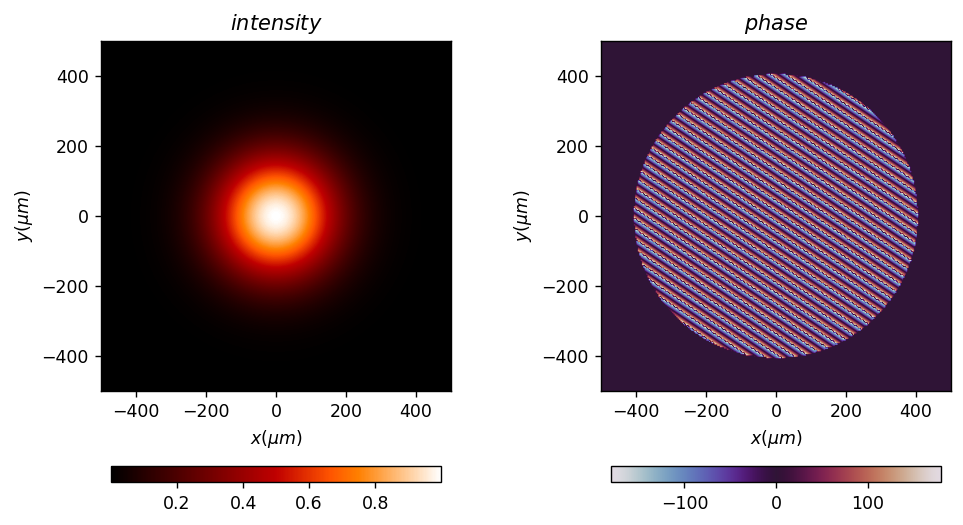

In [34]:
x0 = np.linspace(-500 * um, 500 * um, 256)
y0 = np.linspace(-500 * um, 500 * um, 256)
wavelength = 0.6328 * um

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.gauss_beams_several_inclined(
    A=1,
    num_beams=(5, 5),
    w0=250 * um,
    r0=(0 * um, 0 * um),
    z0=0 * um,
    max_angle=(10 * degrees, 180 * degrees))
u0.draw(kind='field');

## interference

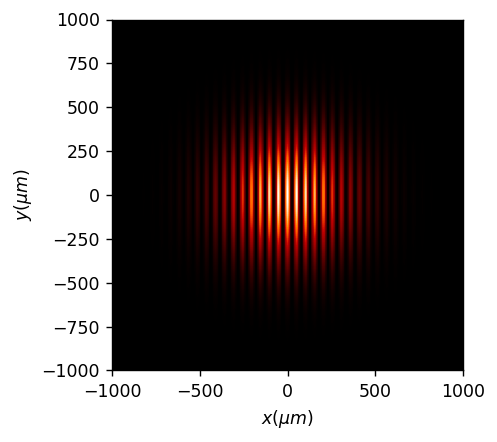

In [35]:
x0 = np.linspace(-1*mm, 1*mm, 512)
y0 = np.linspace(-1*mm, 1*mm, 512)
wavelength = 0.6238 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u2 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

u1.gauss_beam(
    A=1,
    r0=(0 * um, 0 * um),
    w0=(500 * um, 500 * um),
    z0=0 * um,
    phi=2 * degrees,
    theta=10 * degrees)
u2.gauss_beam(
    A=1,
    r0=(0 * um, 0 * um),
    w0=(500 * um, 500 * um),
    z0=0 * um,
    phi=2 * degrees,
    theta=-10 * degrees)

u3 = u1 + u2
u3.draw(kind='intensity');